In [11]:
#!pip install yfinance
#!pip install plotly

     |████████████████████████████████| 4.5 MB 2.0 kB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=4b27a7ff00a2a49de272f5c86fabb62f82d12bef585274e70633f8ece276785b
  Stored in directory: /Users/Jose/Library/Caches/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=962c18e768fbbef3daf4b2c5b69ea50f9c48e3075ef7ea154447e616c74e1a6d
  Stored in directory: /Users/Jose/Library/Caches/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0
     |████████████████████████████████| 13.2 MB 2.9 MB/s eta 0:00:01    |██████████████████████▌         | 9.3 MB 3.8 MB/s eta 0:00:02     |███████████████████████████████▋| 13.0 MB 3.8

In [77]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
from fbprophet import Prophet

In [71]:
import matplotlib.pyplot as plt

In [72]:
ipc = pd.read_html("https://finance.yahoo.com/quote/%5Emxx/components/?guccounter=1")

In [73]:
ipc = ipc[0]
ipc[["Last Price","Change","% Change","Volume"]]=ipc[["Last Price","Change","% Change","Volume"]].fillna(0)
ipc


,Symbol,Company Name,Last Price,Change,% Change,Volume
0,PINFRA.MX,"Promotora y Operadora de Infraestructura, S. A...",156.83,-0.20,-0.13%,0.0
1,BOLSAA.MX,"Bolsa Mexicana de Valores, S.A.B. de C.V.",44.98,0.06,+0.13%,0.0
2,GENTERA.MX,"Gentera, S.A.B. de C.V.",9.55,-0.02,-0.21%,0.0
3,AC.MX,"Arca Continental, S.A.B. de C.V.",104.54,0.36,+0.35%,0.0
4,MEGACPO.MX,"Megacable Holdings, S. A. B. de C. V.",77.58,-0.35,-0.45%,0.0
5,ALSEA.MX,"Alsea, S.A.B. de C.V.",34.59,0.21,+0.61%,0.0
6,ALPEKA.MX,"ALPEK, S.A.B. de C.V.",20.58,-0.15,-0.72%,0.0
7,IENOVA.MX,"Infraestructura Energética Nova, S.A.B. de C.V.",84.54,-0.78,-0.91%,0.0
8,AMXL.MX,"América Móvil, S.A.B. de C.V.",14.34,-0.14,-0.97%,0.0
9,KIMBERA.MX,"Kimberly-Clark de México, S. A. B. de C. V.",35.60,-0.39,-1.08%,0.0


In [90]:
tickers = ipc["Symbol"]

In [94]:
tickers[tickers=="GENTERA.MX"]

2    GENTERA.MX
Name: Symbol, dtype: object

In [110]:
df_stocks_bolsa = wb.DataReader(tickers[tickers=="GENTERA.MX"],"yahoo", "2010-1-1","2021-3-1" )

In [148]:
days = pd.DataFrame(df_stocks_bolsa.index)
df2 = df_stocks_bolsa["Adj Close"]
df = pd.DataFrame({"y":df2},index = days["Date"])
df["ds"] = df.index
df.reset_index(drop = True, inplace = True)
df=df[["ds","y"]]

In [149]:
df

,ds,y
0,2010-12-30,19.677727
1,2011-01-03,19.752010
2,2011-01-04,19.625729
3,2011-01-05,19.105747
4,2011-01-06,18.838322
...,...,...
2543,2021-02-23,8.110000
2544,2021-02-24,8.850000
2545,2021-02-25,9.850000
2546,2021-02-26,10.640000


### Train and test

In [150]:
msk = np.random.rand(len(df))<0.8

In [166]:
train = df[msk]
test = df[~msk]
test_days = pd.DataFrame(test["ds"])

In [159]:
modelo_profeta = Prophet(interval_width=0.95)
modelo_profeta.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [169]:
prediccion = modelo_profeta.predict(test_days)

In [175]:
prediccion["trend"].tail(5)
test["y"].tail(5)

2535    8.25
2536    8.14
2540    7.96
2541    7.99
2545    9.85
Name: y, dtype: float64

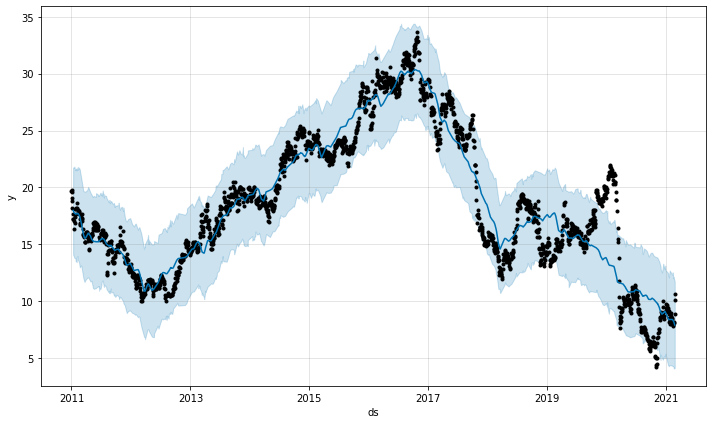

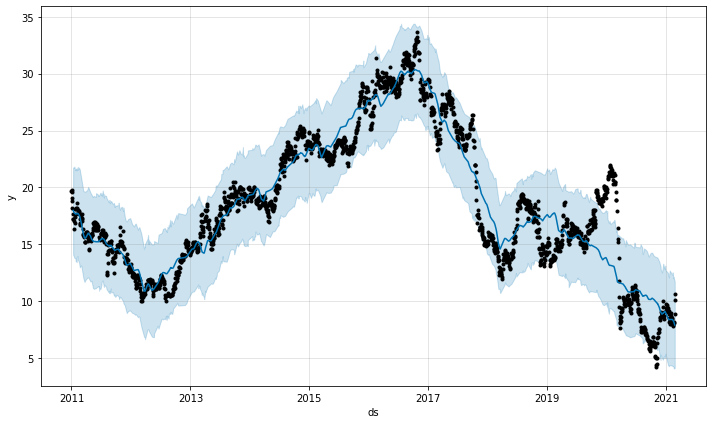

In [172]:
modelo_profeta.plot(prediccion, uncertainty=True)

In [179]:
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(prediccion["trend"] , test["y"]))


R2-score: 0.87
